#Analysing mall customers behavior 

###Inporting Libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

###Creating dataset

In [2]:
dataset = pd.read_csv('Mall_Customers.csv')
X = dataset.iloc[ : ,3:5].values

In [3]:
print(X)

[[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 [ 19  72]
 [ 19  14]
 [ 19  99]
 [ 20  15]
 [ 20  77]
 [ 20  13]
 [ 20  79]
 [ 21  35]
 [ 21  66]
 [ 23  29]
 [ 23  98]
 [ 24  35]
 [ 24  73]
 [ 25   5]
 [ 25  73]
 [ 28  14]
 [ 28  82]
 [ 28  32]
 [ 28  61]
 [ 29  31]
 [ 29  87]
 [ 30   4]
 [ 30  73]
 [ 33   4]
 [ 33  92]
 [ 33  14]
 [ 33  81]
 [ 34  17]
 [ 34  73]
 [ 37  26]
 [ 37  75]
 [ 38  35]
 [ 38  92]
 [ 39  36]
 [ 39  61]
 [ 39  28]
 [ 39  65]
 [ 40  55]
 [ 40  47]
 [ 40  42]
 [ 40  42]
 [ 42  52]
 [ 42  60]
 [ 43  54]
 [ 43  60]
 [ 43  45]
 [ 43  41]
 [ 44  50]
 [ 44  46]
 [ 46  51]
 [ 46  46]
 [ 46  56]
 [ 46  55]
 [ 47  52]
 [ 47  59]
 [ 48  51]
 [ 48  59]
 [ 48  50]
 [ 48  48]
 [ 48  59]
 [ 48  47]
 [ 49  55]
 [ 49  42]
 [ 50  49]
 [ 50  56]
 [ 54  47]
 [ 54  54]
 [ 54  53]
 [ 54  48]
 [ 54  52]
 [ 54  42]
 [ 54  51]
 [ 54  55]
 [ 54  41]
 [ 54  44]
 [ 54  57]
 [ 54  46]
 [ 57  58]
 [ 57  55]
 [ 58  60]
 [ 58  46]
 [ 59  55]

###Using Elbow method to find the optimal number of clusters

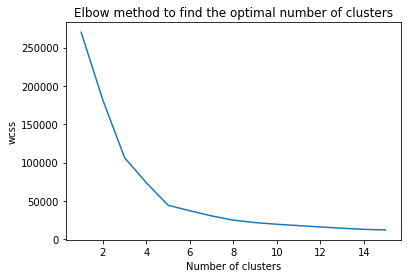

In [13]:
from sklearn.cluster import KMeans
wcss = [] #List to find Within Cluster Sum of Squares
for i in range(1,16):
  Kmeans = KMeans(n_clusters=i,init='k-means++')
  Kmeans.fit(X)
  wcss.append(Kmeans.inertia_)
plt.plot(range(1,16),wcss)
plt.title("Elbow method to find the optimal number of clusters")
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

###Choice of number of clusters:
###After the number of clusters exceed 5, wcss droping rate reduces significantly. 
###Thus we choose n_clusters=5 to train the model

------------------------------------------------

###Training the model

In [19]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

###Visualizing the clusters


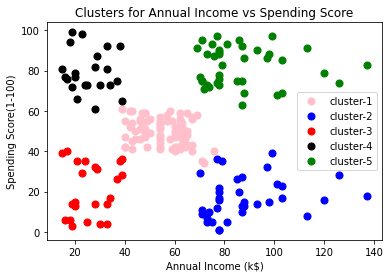

In [24]:
plt.scatter(X[y_kmeans==0,0],X[y_kmeans==0,1],s=50,c='pink',label='cluster-1')
plt.scatter(X[y_kmeans==1,0],X[y_kmeans==1,1],s=50,c='blue',label='cluster-2')
plt.scatter(X[y_kmeans==2,0],X[y_kmeans==2,1],s=50,c='red',label='cluster-3')
plt.scatter(X[y_kmeans==3,0],X[y_kmeans==3,1],s=50,c='black',label='cluster-4')
plt.scatter(X[y_kmeans==4,0],X[y_kmeans==4,1],s=50,c='green',label='cluster-5')
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score(1-100)")
plt.title("Clusters for Annual Income vs Spending Score")
plt.legend()
plt.show()

##Conclusion:
1. The Green cluster contains the customers  who earn more and spend more, thus brand new variety of products can be advertesed for such customers.
2. The Blue cluster are contains the customers who earn more but spend less, thus these customres must be attracted with sophisticated marketing techniques.
3. The Black cluster contains the customers who earn less but spend more, thus we shall not target such customers anymore.
4. The Red and the Pink clustes contains the customes who does not deserve light, as they are in right position in the graph..

###Classifing a new customer into one of the clusters

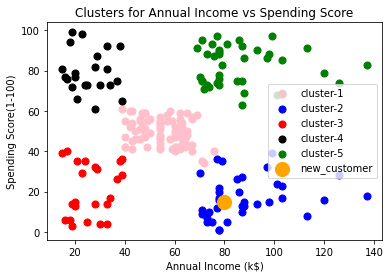

In [28]:
#New customer with Annual income = 80 K$ and spending score of 15 is analised
plt.scatter(X[y_kmeans==0,0],X[y_kmeans==0,1],s=50,c='pink',label='cluster-1')
plt.scatter(X[y_kmeans==1,0],X[y_kmeans==1,1],s=50,c='blue',label='cluster-2')
plt.scatter(X[y_kmeans==2,0],X[y_kmeans==2,1],s=50,c='red',label='cluster-3')
plt.scatter(X[y_kmeans==3,0],X[y_kmeans==3,1],s=50,c='black',label='cluster-4')
plt.scatter(X[y_kmeans==4,0],X[y_kmeans==4,1],s=50,c='green',label='cluster-5')
plt.scatter([80],[15],s=200,c='orange',label='new_customer')
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score(1-100)")
plt.title("Clusters for Annual Income vs Spending Score")
plt.legend()
plt.show()

###Thus the new customer must be marketed with sophisticated marketing techniques 😋